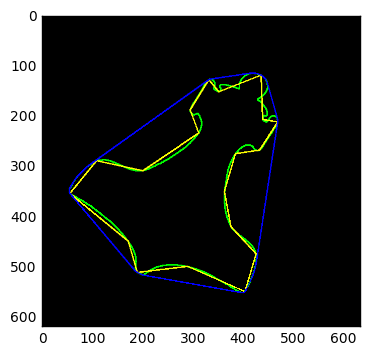

In [2]:
# %load contours_hull.py
import cv2
import numpy as np
from matplotlib import pyplot as plot
%matplotlib inline

img = cv2.pyrDown(cv2.imread("hammer.jpg", cv2.IMREAD_UNCHANGED))

ret, thresh = cv2.threshold(cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY) , 127, 255, cv2.THRESH_BINARY)
black = cv2.cvtColor(np.zeros((img.shape[1], img.shape[0]), dtype=np.uint8), cv2.COLOR_GRAY2BGR)

image, contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
  epsilon = 0.01 * cv2.arcLength(cnt,True)
  approx = cv2.approxPolyDP(cnt,epsilon,True)
  hull = cv2.convexHull(cnt)
  cv2.drawContours(black, [cnt], -1, (0, 255, 0), 2)
  cv2.drawContours(black, [approx], -1, (255, 255, 0), 2)
  cv2.drawContours(black, [hull], -1, (0, 0, 255), 2)

plot.imshow(black)
